In [27]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import re
import math
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
df = pd.read_csv('/path/to/sentiVaderBlob.csv')

In [30]:
# standerdizing function for Original Rating
def map_values(input_array):
    result = []
    
    for value in input_array:
        if value >= 1 and value <= 2:
            result.append(-1)
        elif value == 3:
            result.append(0)
        elif value >= 4 and value <= 5:
            result.append(1)
        else:
            result.append(None)            
    return result

# standerdizing function for Vader and TextBlob
def map_vader_tb_values(input_array):
    result = []    
    for value in input_array:
        if value >= -1 and value < 0:
            result.append(-1)
        elif value == 0:
            result.append(0)
        elif value > 0 and value <= 1:
            result.append(1)
        else:
            result.append(None)            
    return result

In [31]:
Ratings = df['Rating']
StandardRatings = map_values(Ratings)

In [32]:
Vader = df['vaderValue']
StandardVaderRatings = map_vader_tb_values(Vader)

In [33]:
TextBlob = df['textBlobValues']
StandardTBRatings = map_vader_tb_values(TextBlob)

In [34]:
# adding all standard data to csv file
df['StandardRating'] = StandardRatings
df['StandardVaderRatings'] = StandardVaderRatings
df['StandardTBRatings'] = StandardTBRatings

In [35]:
df.to_csv(r'/path/to/sentiVaderBlobStandard.csv',index=False, sep=',', encoding='utf-8')

## plots

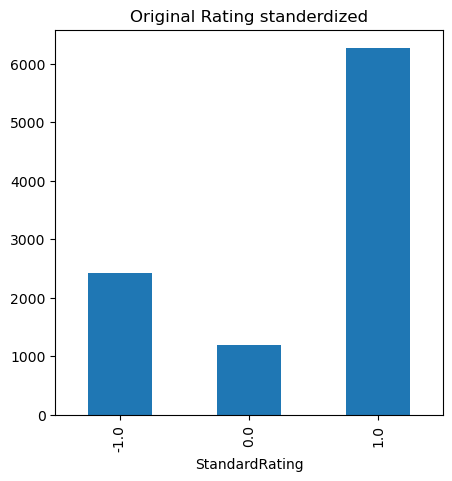

In [36]:
df['StandardRating'].value_counts().sort_index().plot(kind='bar',figsize=(5,5))
plt.title('Original Rating standerdized');

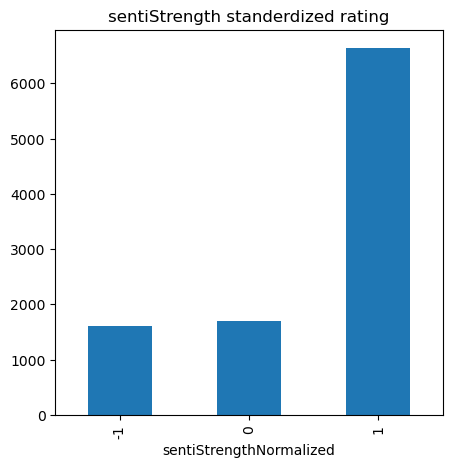

In [37]:
df['sentiStrengthNormalized'].value_counts().sort_index().plot(kind='bar',figsize=(5,5))
plt.title('sentiStrength standerdized rating');

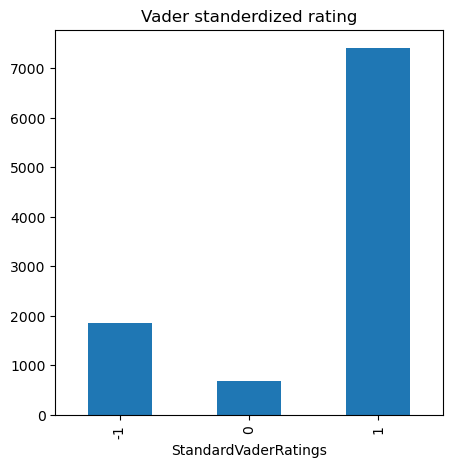

In [38]:
df['StandardVaderRatings'].value_counts().sort_index().plot(kind='bar',figsize=(5,5))
plt.title('Vader standerdized rating');

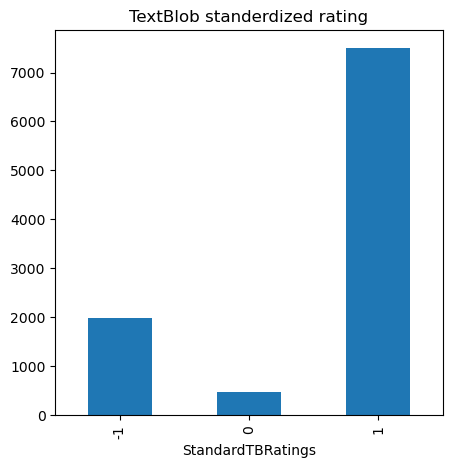

In [39]:
df['StandardTBRatings'].value_counts().sort_index().plot(kind='bar',figsize=(5,5))
plt.title('TextBlob standerdized rating');

In [40]:
# value counts for benchmark
standardRatingValues = df['StandardRating'].value_counts().sort_index().to_numpy()
sentiStrengthValues = df['sentiStrengthNormalized'].value_counts().sort_index().to_numpy()
standardVaderValues = df['StandardVaderRatings'].value_counts().sort_index().to_numpy()
standardTBValues = df['StandardTBRatings'].value_counts().sort_index().to_numpy()

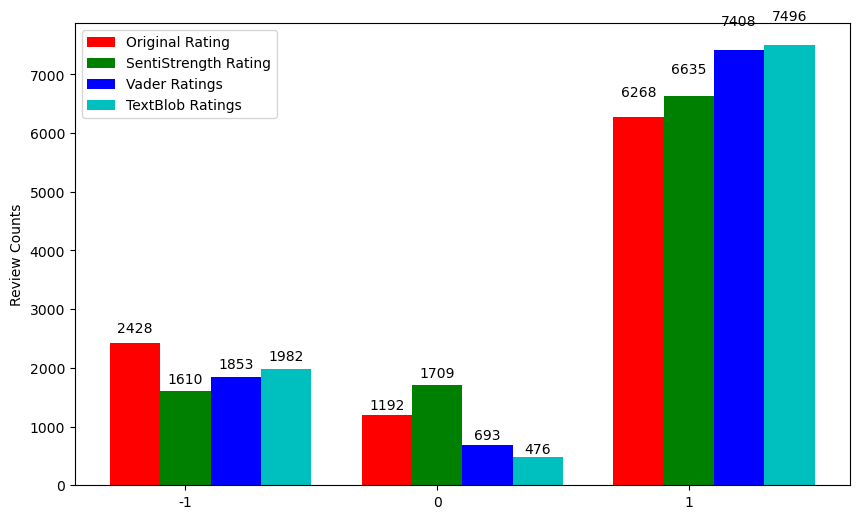

In [41]:
# box plots for benchmark all four together
N = 3
ind = np.arange(N)
width = 0.20

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)

rects1 = ax.bar(ind, standardRatingValues, width, color='r')

rects2 = ax.bar(ind+width, sentiStrengthValues, width, color='g')

rects3 = ax.bar(ind+width*2, standardVaderValues, width, color='b')

rects4 = ax.bar(ind+width*3, standardTBValues, width, color='c')

ax.set_ylabel('Review Counts')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('-1', '0', '1') )
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Original Rating', 'SentiStrength Rating', 'Vader Ratings', 'TextBlob Ratings') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

## wordcloud

In [42]:
# preprocessing for wordcloud creation
df['new_reviews'] = df['Review'].str.replace('[^\w\s]','',regex=True).str.lower()

In [43]:
# remove emoticons
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['new_reviews'] = df['new_reviews'].apply(lambda x: remove_emoji(x))

In [44]:
# stopword removal
stop = stopwords.words('english')
df['new_reviews'] = df['new_reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head(20)

,Review,Rating,sentiStrength,sentiStrengthNormalized,vaderValue,textBlobValues,StandardRating,StandardVaderRatings,StandardTBRatings,new_reviews
0,"The ambience was good, food was quite good . h...",5.0,3,1,0.9664,0.660000,1.0,1,1,ambience good food quite good saturday lunch c...
1,Ambience is too good for a pleasant evening. S...,5.0,2,1,0.9360,0.606667,1.0,1,1,ambience good pleasant evening service prompt ...
2,A must try.. great food great ambience. Thnx f...,5.0,2,1,0.9186,0.540000,1.0,1,1,must try great food great ambience thnx servic...
3,Soumen das and Arun was a great guy. Only beca...,5.0,2,1,0.8591,0.500000,1.0,1,1,soumen das arun great guy behavior sincerety g...
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,2,1,0.9201,0.577500,1.0,1,1,food goodwe ordered kodi drumsticks basket mut...
5,"Ambiance is good, service is good, food is aPr...",5.0,2,1,0.9565,0.785000,1.0,1,1,ambiance good service good food apradeecp subr...
6,"Its a very nice place, ambience is different, ...",5.0,2,1,0.7264,0.280000,1.0,1,1,nice place ambience different food ordered tas...
7,Well after reading so many reviews finally vis...,4.0,0,0,0.2329,0.256250,1.0,1,1,well reading many reviews finally visited plac...
8,"Excellent food , specially if you like spicy f...",5.0,3,1,0.9638,0.536735,1.0,1,1,excellent food specially like spicy food court...
9,Came for the birthday treat of a close friend....,5.0,2,1,0.9831,0.659524,1.0,1,1,came birthday treat close friend perfect place...


In [45]:
#Negative reviews for word cloud
neg_phrases = df[df.StandardRating == -1]
neg_words = []
for t in neg_phrases.new_reviews:
    neg_words.append(t)
neg_text = pd.Series(neg_words).str.cat(sep=' ')

In [46]:
# here, negative reviws also include positive words -> not good
for t in neg_phrases.new_reviews[:300]:
    if 'good' in t:
        print(t)

place dinner days back ambience good restaurant almost half occupied immediately got table waited 10 mins get water menu reminders ordered starters main course items mock drinks starters could served 30 mins sign mock drinks noticed similar service issues tables noticed guests literally shouting staff food average dishes prepared well least compared 41 rating zomato finally decided starters hop onto another restaurant rest meal
food quality taste good super slow service nice ambience poor customer handling lot items available even menu
liked food ambience problem staff responsive weve ordered one item got something else otherwise place food good
waiters good enough get items ordered overall bad experience waiting time expected
pathetic horrible experience ambience hospitality 1 food 1 chairs tables broken food cold tasteless buffet arrangement good could bit spacious
4 people visited place thursday nightambience service good food disappointednot worth money pay
hi time satisfied flecha

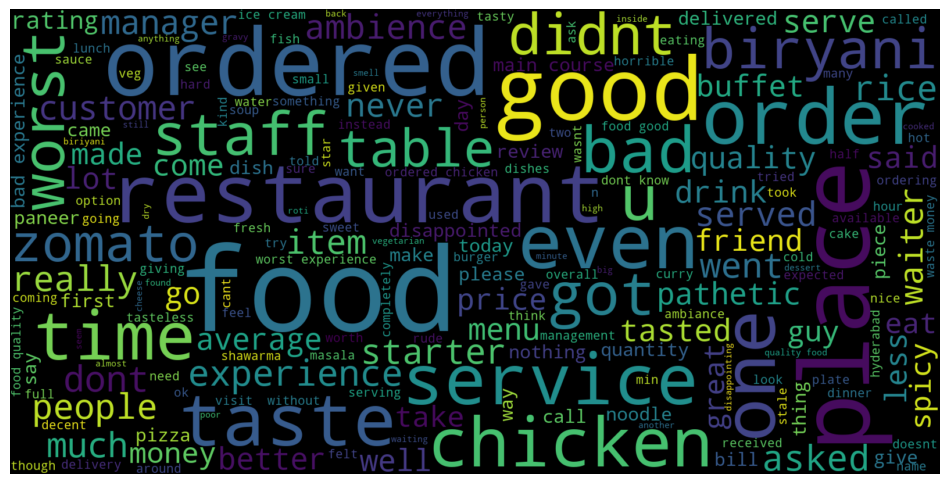

In [47]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
#positive reviews for word cloud
pos_phrases = df[df.StandardRating == 1]
pos_string = []
for t in pos_phrases.new_reviews:
    pos_string.append(t)
pos_text = pd.Series(pos_string).str.cat(sep=' ')

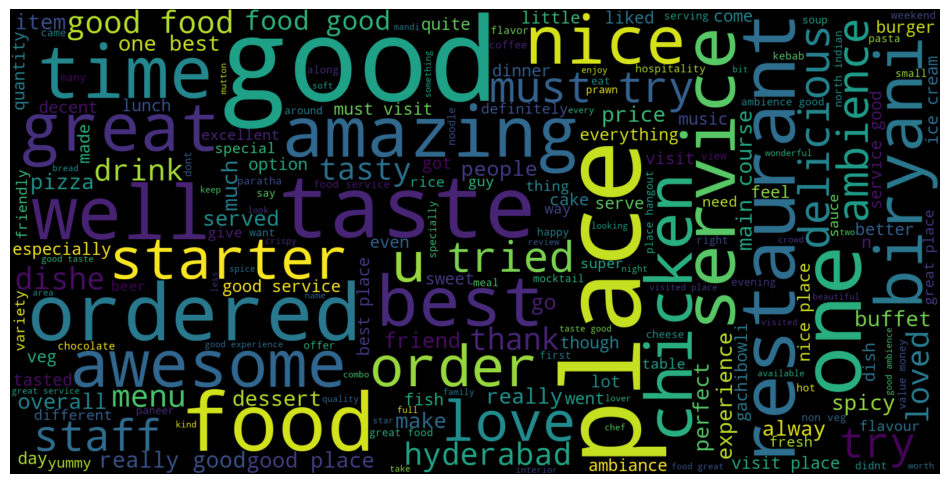

In [49]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [50]:
#neutral reviews for word cloud and do above
neu_phrases = df[df.StandardRating == 0]
neu_string = []
for t in neu_phrases.new_reviews:
    neu_string.append(t)
neu_text = pd.Series(neu_string).str.cat(sep=' ')

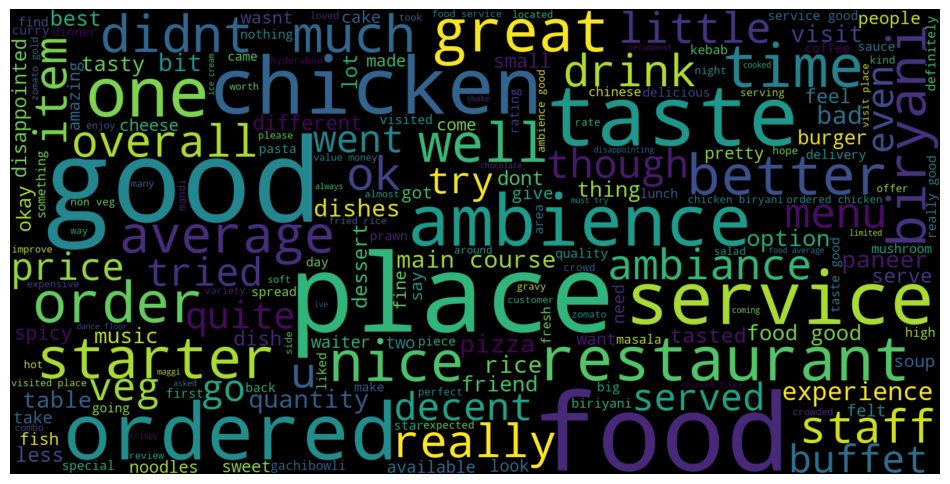

In [51]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neu_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [52]:
df.to_csv(r'/path/to/cleanedWithAll.csv',index=False, sep=',', encoding='utf-8')